In [1]:
import torch
from torch.utils.data import DataLoader

from networks.dataset.news_dataset import NewsDataset
from networks.model.rnn_classifier import FakeNewsRNNClassifier
from networks.train.train_model import train_model

%load_ext autoreload
%autoreload 2

In [2]:
embedding_matrix = torch.load("../registry/embeddings/embedding_matrix.pt")

In [3]:
use_gpu = True
DEVICE = "cuda" if use_gpu else "cpu"
DEVICE

'cuda'

In [4]:
data = torch.load("../registry/datasets/processed_dataset.pt")
X_title = data["X_title"]
X_text = data["X_text"]
y = data["y"]

In [5]:
train_size = int(len(X_title) * 0.7)

X_train_title = X_title[:train_size]
X_val_title = X_title[train_size:]

X_train_text = X_text[:train_size]
X_val_text = X_text[train_size:]

y_train = y[:train_size]
y_val = y[train_size:]

In [6]:
y_train.shape

torch.Size([27047])

In [7]:
model = FakeNewsRNNClassifier(embedding_matrix, hidden_size=100)
title_batch = X_title[:32]
text_batch = X_text[:32]

output = model(title_batch, text_batch)
print(output.shape)

torch.Size([32])


In [8]:
train_dataset = NewsDataset(X_train_title, X_train_text, y_train)
val_dataset = NewsDataset(X_val_title, X_val_text, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

Using device: cuda


Training: 100%|██████████ [Elapsed: 00:31 | Remaining: 00:00]



|Epoch 1/10| Train Loss: 0.1483; Val Loss: 0.0775; Val F1: 0.9633


Training: 100%|██████████ [Elapsed: 00:30 | Remaining: 00:00]



|Epoch 2/10| Train Loss: 0.0485; Val Loss: 0.0722; Val F1: 0.9635


Training: 100%|██████████ [Elapsed: 00:30 | Remaining: 00:00]



|Epoch 3/10| Train Loss: 0.0140; Val Loss: 0.0998; Val F1: 0.9673


Training: 100%|██████████ [Elapsed: 00:30 | Remaining: 00:00]



|Epoch 4/10| Train Loss: 0.0072; Val Loss: 0.1269; Val F1: 0.9595
EarlyStopping patience: 1/3


Training: 100%|██████████ [Elapsed: 00:30 | Remaining: 00:00]



|Epoch 5/10| Train Loss: 0.0090; Val Loss: 0.1351; Val F1: 0.9593
EarlyStopping patience: 2/3


Training: 100%|██████████ [Elapsed: 00:31 | Remaining: 00:00]



|Epoch 6/10| Train Loss: 0.0058; Val Loss: 0.1429; Val F1: 0.9589
EarlyStopping patience: 3/3
Early stopping triggered at epoch 6

Best Val F1: 0.9673


          Model Evaluation Metrics           
┏━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Train Value ┃ Validation Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ f1_score │      0.9985 │           0.9589 │
│ roc_auc  │      0.9999 │           0.9946 │
└──────────┴─────────────┴──────────────────┘

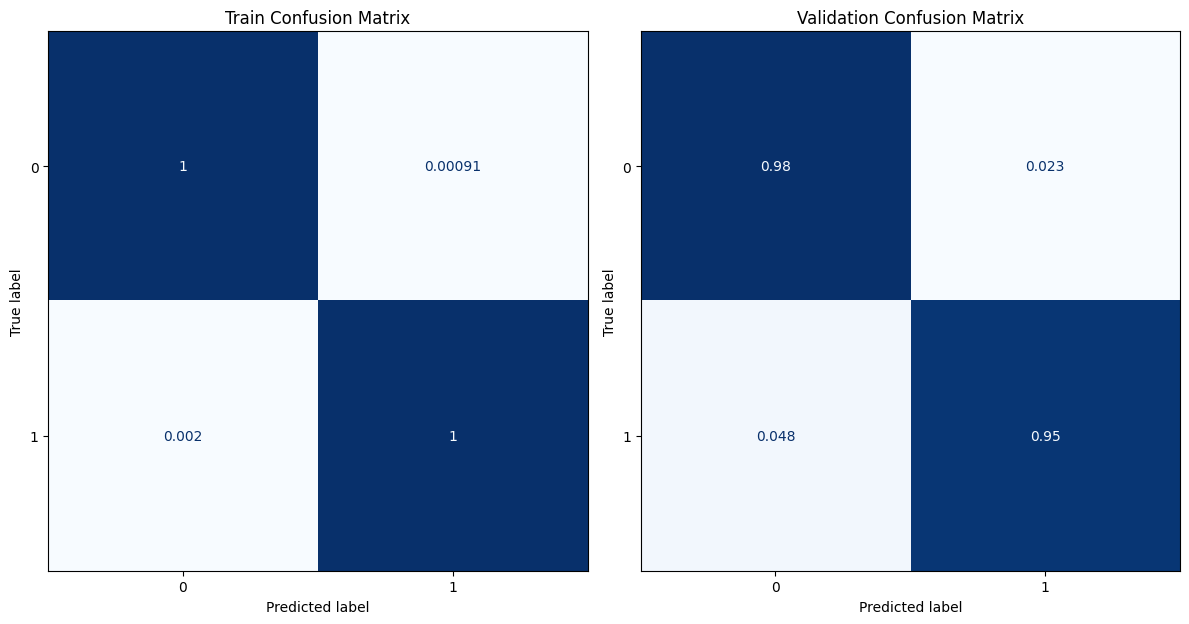

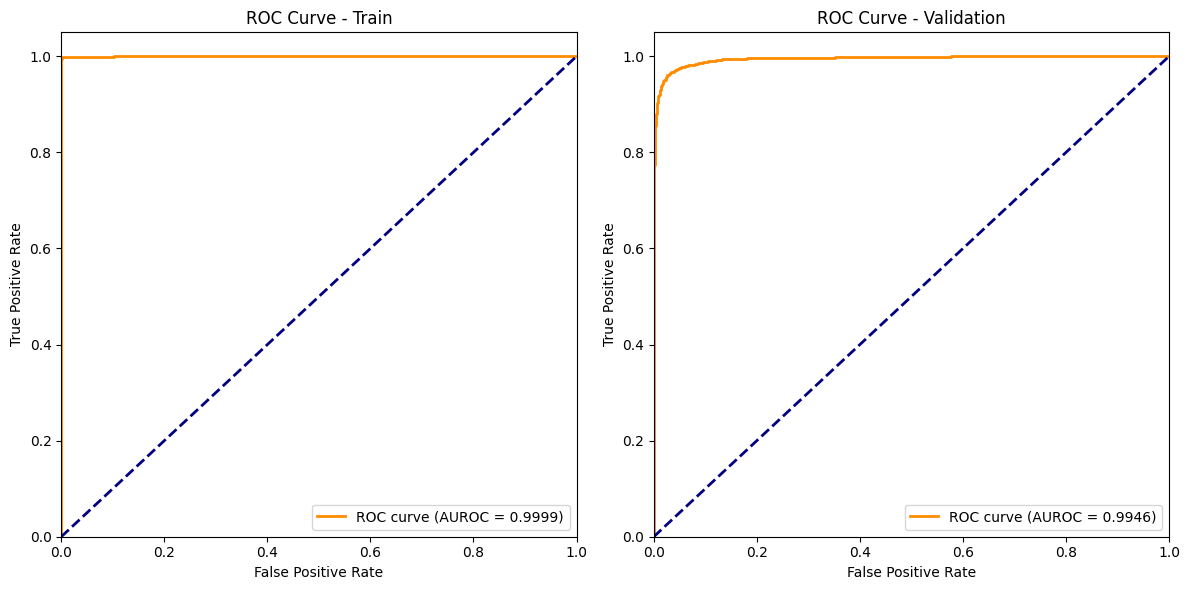

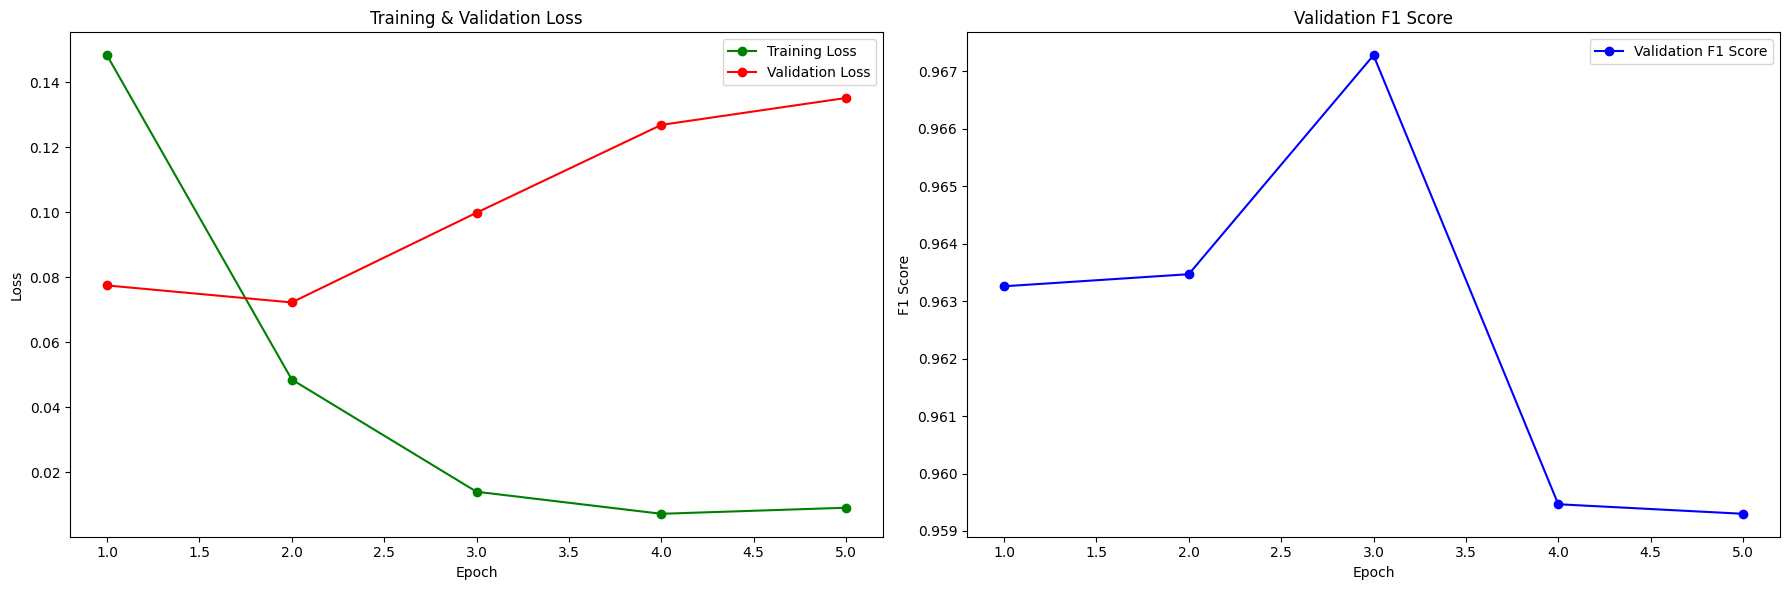

(FakeNewsRNNClassifier(
   (embedding): Embedding(50000, 300, padding_idx=0)
   (title_encoder): GRU(300, 100, batch_first=True)
   (text_encoder): GRU(300, 100, batch_first=True)
   (dropout): Dropout(p=0.3, inplace=False)
   (fc): Linear(in_features=200, out_features=1, bias=True)
 ),
 {'train_loss': [0.14828752684483995,
   0.04849426647586017,
   0.01395784232198849,
   0.007168099339577056,
   0.00903270936788618],
  'val_loss': [0.07745078827970284,
   0.07221877564529865,
   0.09982618707135646,
   0.1268536281276792,
   0.13514318194169136],
  'val_f1': [0.9632599978324482,
   0.9634703196347032,
   0.9672818791946308,
   0.9594652867615352,
   0.9592992201687854]})

In [9]:
train_model(model, train_loader, val_loader, num_epochs=10, device=DEVICE)